# Telco Churn Report

## Goals
- Find drivers for customer churn at Telco. Why are customers churning?

- Construct a ML classification model that accurately predicts customer churn.

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# system import to access file on different directory 
import sys
sys.path.append("/Users/migashane/CodeUp/Data_Science/telco_churn_classification_project/util_")

# wrangle and eda files
import acquire_
import prepare_
import explore_
import hyp_test_
import final_visuals_


Shape of splits: (4225, 62) (1409, 62) (1409, 62)


## Acquire

I am using the Telco churn data from the Codeup database.

- Join all data from contract type, internet service type, and payment type with the customer table.
    
- 7043 rows and 24 columns
    - 18 object amd 6 numric and
- No null in the entire data

## Prepare

**Actions taken**

- Remove duplicated columns.
- Remove columns I demed non important for analysis.
- Check column data types for consistance in data.
- Simple visualization of value count for each colum.
- Encode all categorical variables.
    - Assign appropriate names to the dummies
    - Join dummies back to the data
- Add a baseline columns to use later in modeling.
- Split data into train, validate, and test.
    - 60/20/20 split


### Data Dictionary

|**Feature**|**Definition**|
|----|----|
|`payment_type_id`| Represents an identifier or code for different payment types, such as credit card, bank transfer, or electronic payment methods.|
|`gender`| Rrepresent the gender of the customer, indicated as "Male" or "Female".|
|`senior_citizen`| Indicate whether the customer is classified as a senior citizen, represented as a binary variable (1 for senior citizen, 0 for non-senior).|
|`partner`| Indicate whether the customer has a partner or spouse, represented as a binary variable (1 for yes, 0 for no).|
|`dependents`| Indicate whether the customer has dependents (e.g., children or other family members), represented as a binary variable (1 for yes, 0 for no).|
|`tenure`| Represents the length of time (in months) that a customer has been using the service or has been a subscriber.|
|`phone_service`| This column could indicate whether the customer has phone service, represented as a binary variable (1 for yes, 0 for no)."
|`tech_support`| Indicates whether the customer has technical support available for their service (e.g., 1 for yes, 0 for no).|
|`streaming_tv`| Indicates whether the customer has access to streaming television services (e.g., 1 for yes, 0 for no).|
|`streaming_movies`| Indicates whether the customer has access to streaming movie services (e.g., 1 for yes, 0 for no).|
|`paperless_billing`| Indicates whether the customer has opted for paperless billing (e.g., 1 for yes, 0 for no).|
|`monthly_charges`| Represents the monthly charges or fees for the service subscribed by the customer.|
|`total_charges`| Represents the total charges incurred by the customer during their tenure.|
|`churn`| Indicates whether the customer has churned or discontinued their service (e.g., 1 for churned, 0 for active).|
|`contract_type`| Represents the type of contract or service agreement (e.g., month-to-month, one-year contract, two-year contract).|
|`internet_service_type`| Represents the type of internet service (e.g., DSL, fiber optic, cable).|
|`payment_type`| Represents the payment method used by the customer (e.g., credit card, bank transfer, electronic payment).|




### Get data

In [2]:
# acquiring, cleaning, and adding features to data
telco = prepare_.final_prep_telco()

# splitting data into train, validate, and test
train, validate, test = prepare_.split_data_(df=telco,
                     test_size=0.2, 
                     validate_size=0.2,
                    stratify_col="churn",
                    random_state=95)

# look at the different splits
print("Shape of splits:",train.shape, validate.shape, test.shape)

Shape of splits: (4225, 62) (1409, 62) (1409, 62)


### Quick look at the data

In [3]:
train.head() # Transpose the data for a better look

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,contract_type_one year,contract_type_two year,internet_service_type_dsl,internet_service_type_fiber optic,internet_service_type_none,payment_type_bank transfer (automatic),payment_type_credit card (automatic),payment_type_electronic check,payment_type_mailed check,baseline
2872,Male,0,No,Yes,48,Yes,Yes,Yes,No,Yes,...,1,0,1,0,0,0,1,0,0,0
1106,Female,0,No,No,2,Yes,Yes,No,No,No,...,0,0,0,1,0,0,0,1,0,0
2081,Female,1,Yes,No,70,Yes,Yes,Yes,No,No,...,0,0,0,1,0,0,0,1,0,0
6880,Male,1,Yes,No,27,Yes,Yes,No,Yes,Yes,...,0,0,1,0,0,1,0,0,0,0
6205,Female,0,Yes,No,52,Yes,No,Yes,No,Yes,...,1,0,1,0,0,0,0,0,1,0


### Summary of data

In [4]:
train.describe() # Transpose for better kook

,senior_citizen,tenure,monthly_charges,total_charges,churn,gender_female,gender_male,partner_no,partner_yes,dependents_no,...,contract_type_one year,contract_type_two year,internet_service_type_dsl,internet_service_type_fiber optic,internet_service_type_none,payment_type_bank transfer (automatic),payment_type_credit card (automatic),payment_type_electronic check,payment_type_mailed check,baseline
count,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,...,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.0
mean,0.159763,32.589112,64.621456,2292.584538,0.265325,0.490414,0.509586,0.506982,0.493018,0.692544,...,0.211361,0.237870,0.346982,0.437633,0.215385,0.220118,0.217041,0.334438,0.228402,0.0
std,0.366430,24.465153,30.044085,2268.572655,0.441559,0.499967,0.499967,0.500010,0.500010,0.461494,...,0.408322,0.425829,0.476066,0.496154,0.411138,0.414375,0.412280,0.471849,0.419853,0.0
min,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,9.000000,35.450000,412.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,29.000000,70.250000,1402.250000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.000000,56.000000,89.750000,3804.400000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
max,1.000000,72.000000,118.750000,8672.450000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


## Explore

### Does the type of internet service significantly impact the likelihood of churn?

- $H_0$: The type of internet service does not significantly impact the likelihood of churn?
- $H_a$: The type of internet service significantly impact the likelihood of churn?

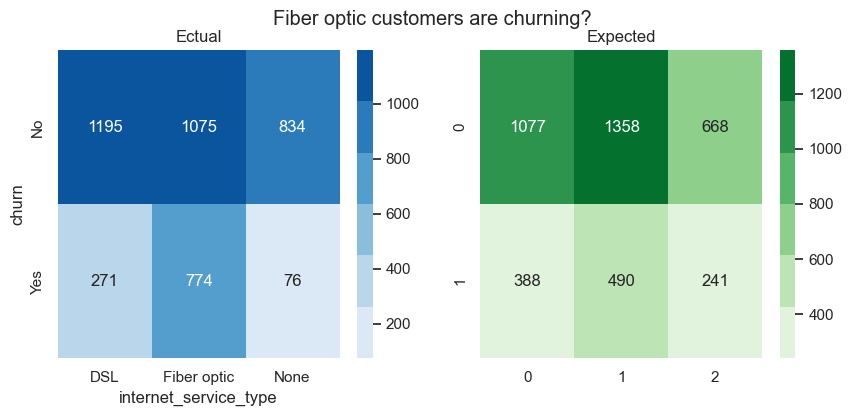

In [5]:
final_visuals_.internet_service_impact_on_churn_visual()

- We reject the null. This means that the type of internet service does impact the likelihood of churn?

- Fiber optic customers are churing at a higer rate than expected. Telco is lossing about 280 customers than expected.

### What month are customers most likely to churn and does that depend on their contract type?

**1. Is there a linear relationship between monthly charges and tenure?¶**

- $H_0$: There is not linear relationship between monthly charges and tenure.
- $H_a$: There is linear relationship between monthly charges and tenure.

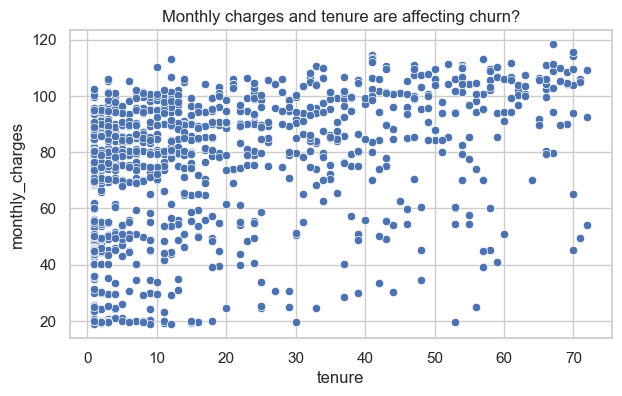

In [6]:
final_visuals_.monthly_charges_and_tenure_vusual()

- The test rejects the null showing that there is a small linear relationship between monthly charges and tenure.

**2. Are customers more or less likely to churn within the first 24 month with Telco?**

- $H_0$: Customer churn rate with in the first 24 month is > 50%
- $H_a$: Customer churn rate with in the first 24 month is <= 50%

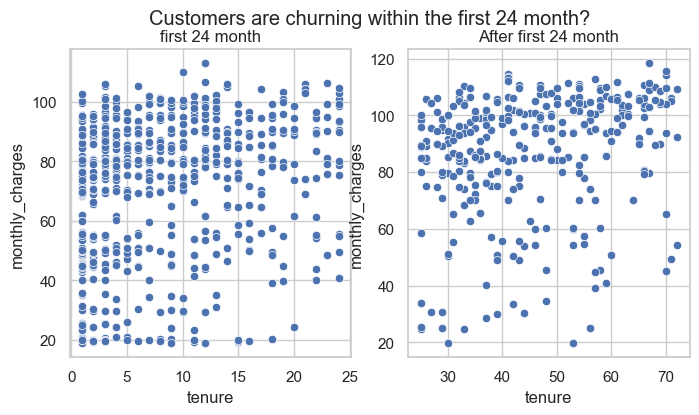

In [7]:
final_visuals_.churn_in_first_24_month_visual()

- We reject the null.
- Customer churn with in the first 24 months looks to be greater than 50% of all churns.

**3. What role does contract type play in the first 24 month?**

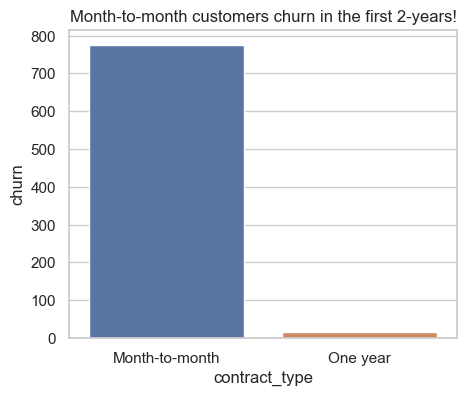

In [8]:
final_visuals_.role_of_contract_type_visual()

- Customers on a month-to-month cotract churn in the first two years.

**Conclusion:**
- We have enough evidence to say that customers are more likly to churn within the first 24 month and contract type and monthy charges have a big part to play with it.

### Do customers with technical support have a lower churn rate compared to those without it?

- $H_0$: Customers with technical support have the same or higher churn rate as those without it.
- $H_a$: Customers with technical support have lower churn rate compared to those without it.

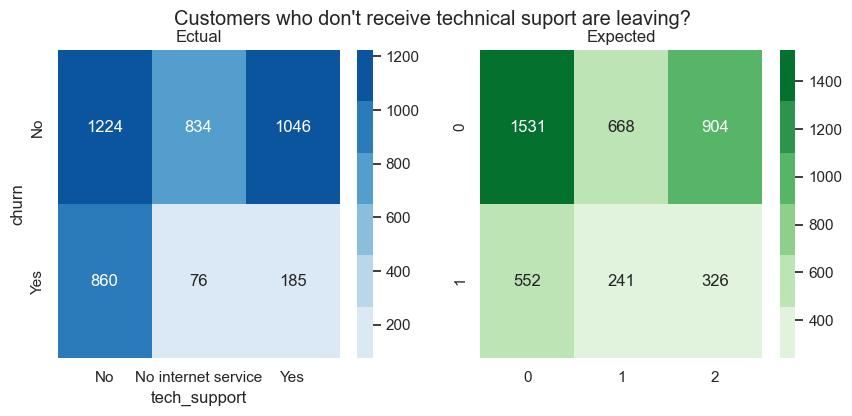

In [9]:
final_visuals_.tech_support_vs_churn_visual()

- We can reject the null. Customers with technical support have lower churn rate compared to those without it.

## Modeling

## Future

- I would be good to get some more data on dates that customers made there transactions. this could help with the accuracy of the months telco should target ig the want to save those customers.

- It would help to have imformation about age of customer to try and see if age and payment type are related some how to why customers churn

- it could be good to get geographic data to to determin which zipcods is churn accuring a a higher rate.

- plitical standing of telco

- did the custmer have dept they needed to pay. how is churn affected by customer dept.